# 미니 프로젝트
## 회사 정보 요약

- 취업/ 이직자를 위한 회사정보 요약 서비스
    - 전/ 현직자 리뷰 정리
        - 리뷰 전체 한줄 요약
        - 리뷰 다수 등장 키워드 (예정)
    - 최근 회사 뉴스 정리
        - 최근 뉴스 요약 및 링크 제공
        - 최근 뉴스 평가 및 시각화

- 미니 프로젝트에서는 프로젝트의 얼개를 보여주는것이 중요하다고 판단
    - 적극적으로 사전학습되어있는 모델을 사용
    - 이후 자체 모델 또는 전이학습/미세조정 예정
- 모델의 선택
    - 여러 문장의 요약/평가를 직접 확인
    - 개중 가장 결과물의 퀄리티가 좋은 모델을 선택

### 플로우 차트
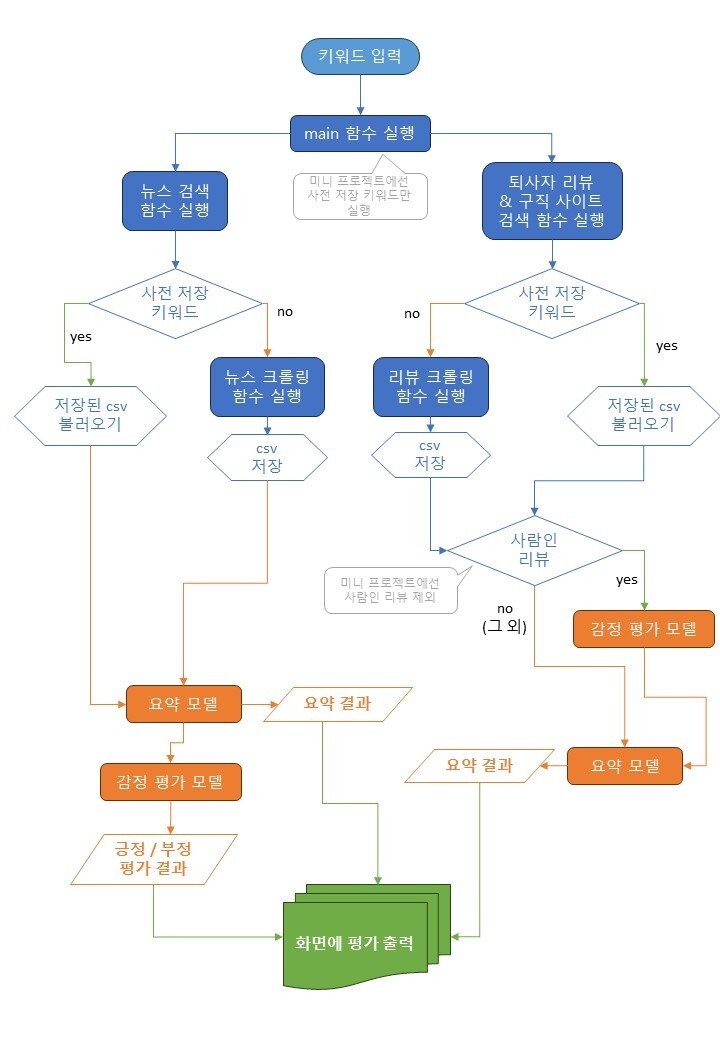

- 요약모델 : (추후 전이학습 또는 미세조정 예정)
    - MT5-M2M Model (뉴스 요약)
    - T5-Base Model (리뷰 요약)
- 평가모델 : (추후 자체 모델로 변경 예정)
    - KRFinBert Model (뉴스 평가)

- 고려했던 모델
    - kobert sum : 요약 결과가 매끄럽지 못함
    - NCMS : 특정 데이터셋에만 최적화 되어있었음

- 크롤링 모듈 :
    - 리뷰 크롤링은 셀레늄을 이용 (추후 리퀘스츠와 비동기를이용해 성능 향상 예정)
    - 뉴스 크롤링은 리퀘스츠를 이용
- 크롤링된 데이터는 이후 직접 제작할 긍정/부정 평가모델의 데이터셋으로 이용 예정

### 이후 업데이트될 기능들
- 모델 관련
    - 사전 학습된 모델들을 데이터에 맞게 파인 튜닝예정
        - 가능한 경우 데이터를 크롤링 후 데이터셋 제작후 자체 모델(LSTM or GRU) 시도 예정 
    - 리뷰의 긍정 키워드와 부정 키워드 추출 모델 및 해당 키워드의 시각화 기능
    - 키워드 기반의 회사 추천 모델 또는 비슷한 회사 추천 모델
- 크롤러 관련
    - 서버를 통해 회사들의 정보를 매일 일괄 수집 가능
- 데이터 관리
    - 추루 DB를 통해 여러 기술 스택의 사용 가능


- 등등 프로젝트를 만들어가며 추가예정

### Git 버전관리
- git을 이용한 버전관리 체계
    - 브랜치 전략은 Git Flow를 이용
        - master/develop/feature 브랜치를 나누어 사용하는 전략
    - 최종 프로젝트 전에 익숙해지고자 함
        - 미니 프로젝트 중간에 깃 충돌 이슈 발생 -> 해결
    - 여러 PC와 서버에서 코드 공유/ 수정
        - 각각 개인 PC와 노트북에서 개발후 cuda 지원 서버에서 모델 사용

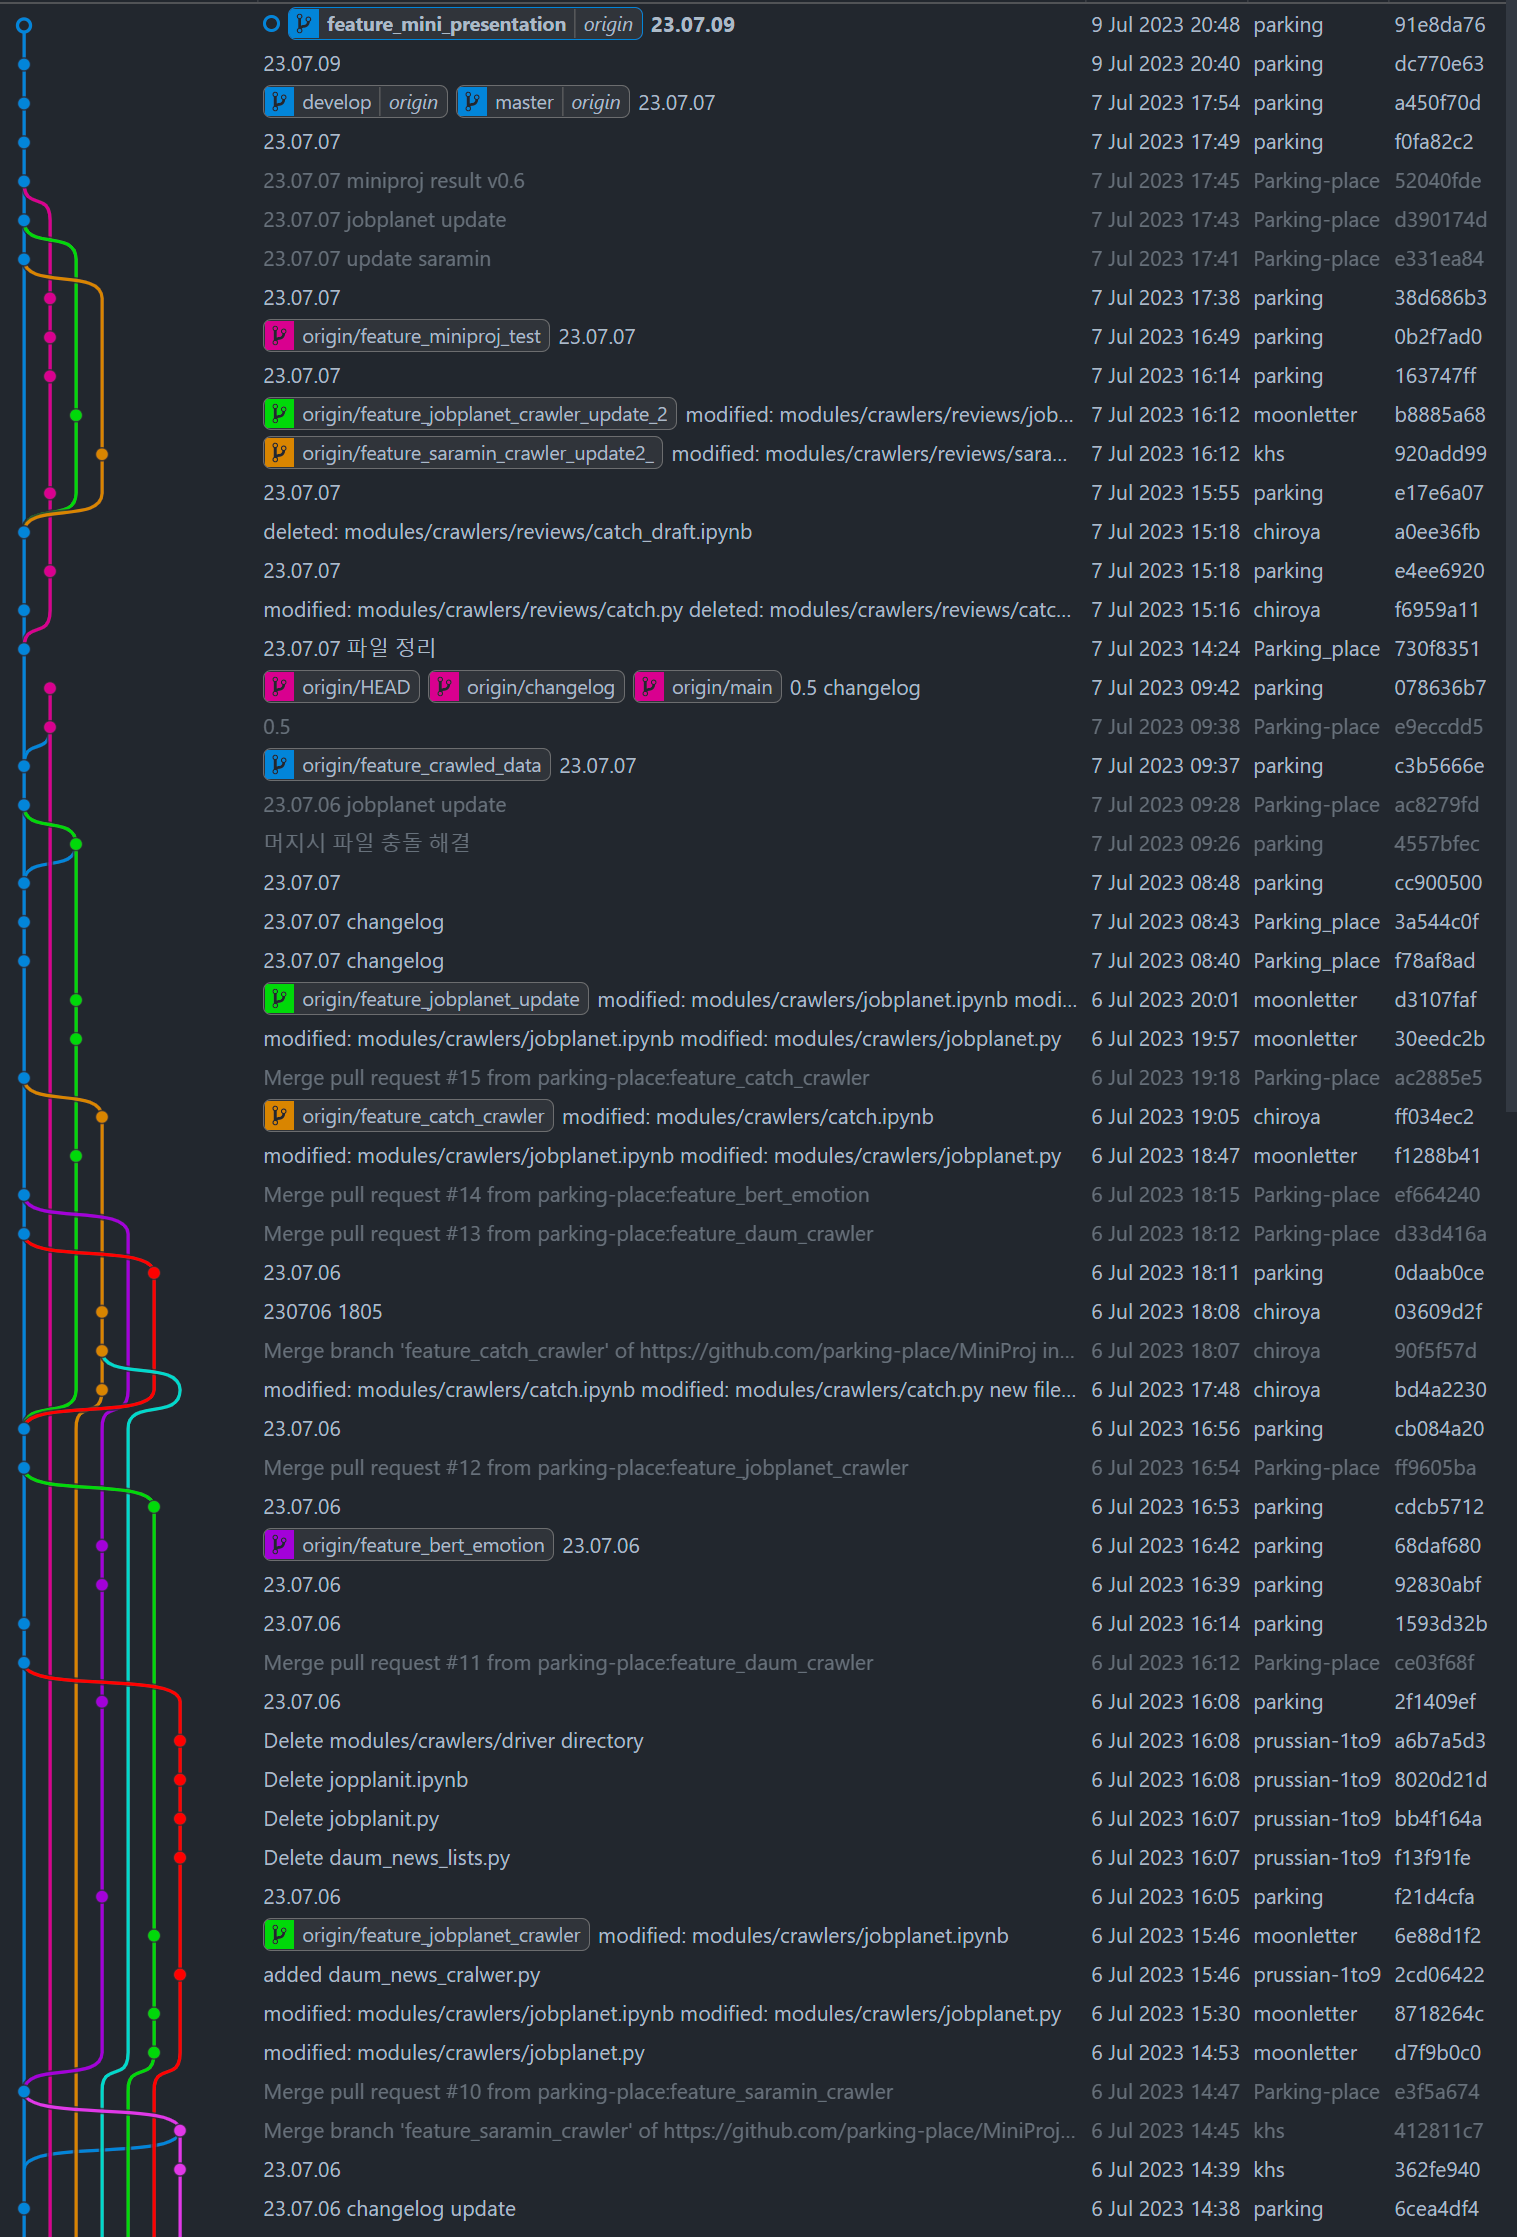

## 각 기능들의 모듈화
- 각 기능들을 나누어 개발/ 모듈화를 적극적으로 활용
    - 모듈화를 통해 테스트 시에는 함수 하나만 불러와도 사용 가능
    - 각 모델이 다중 임포트 되지 않음
    - 로그인 정보등은 git을 통해 공유되지 않게 설정

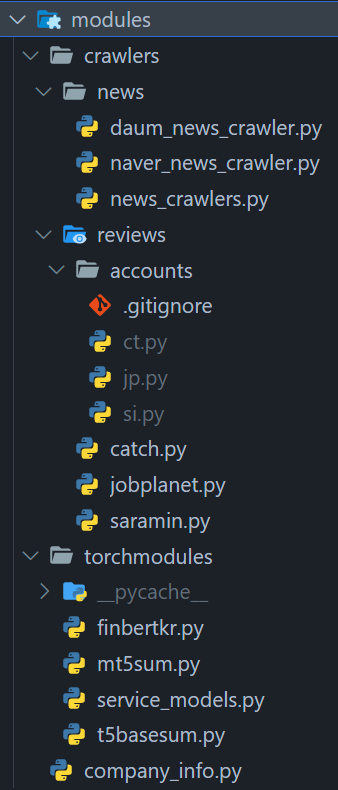

# 시연

## 모듈 임포트

In [2]:
from modules.company_info import CompanyInfo

comp_info = CompanyInfo()

[nltk_data] Downloading package punkt to /home/parking/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# 긍정/부정 뉴스양 시각화 함수
def visualize_news_sentiment(news_df):
    news_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))

# 네이버 정보 탐색/ 요약

## 회사 정보/리뷰 검색

In [4]:
naver_info = comp_info.get_company_info('네이버')

naver_news, naver_reviews, naver_review_summarized_dict = naver_info

2023-07-09 11:37:10.858510: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 11:37:11.317661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 긍정/ 부정 리뷰 한줄 요약

In [5]:
naver_review_summarized_dict['good_summarise_long']

'회사에서 생활부분에 있어서 긍정적인 생각을 가지고 있는 직원들에게 믿음을 맡길 수 있는 장점이 있다.'

In [6]:
naver_review_summarized_dict['bad_summarise_long']

'회사 규모가 너무 커서 의사결정이 많이 느려진 것 같다.'

In [7]:
naver_review_summarized_dict['good_summarise_short']

'한국에서 가장 큰 IT회사라는 네임벨류가 있다.'

In [8]:
naver_review_summarized_dict['bad_summarise_short']

'회사에 가장 많은 인턴이 나오고 있다.'

## 최근 기사 링크/ 기사요약/ 기사 평가

In [9]:
naver_news[['link', 'summarized', 'sentiment']].head(10)

,link,summarized,sentiment
0,http://v.daum.net/v/20230706145703665,네이버가 지난 2분기 최대 규모로 약 19만원대로 진입했다.,positive
1,http://v.daum.net/v/20230707040742497,네이버가 뉴스 검색 알고리즘에 개입했다.,negative
2,http://v.daum.net/v/20230707093354918,네이버가 뉴스 인공지능(AI) 알고리즘 피처를 공개했다.,neutral
3,http://v.daum.net/v/20230707091220958,네이버가 뉴스 인공지능(AI) 알고리즘 피처를 공개했다.,neutral
4,http://v.daum.net/v/20230707101855839,네이버가 뉴스 인공지능(AI) 알고리즘을 새롭게 구성했다.,neutral
5,http://v.daum.net/v/20230707060104617,네이버가 지난 7일(현지시간) 신종 코로나바이러스 감염증 (코비드19) 사태를 선포했다.,neutral
6,http://v.daum.net/v/20230707094206233,네이버페이가 데이터센터 재해 발생 시에도 비상대응훈련을 실시한다.,neutral
7,http://v.daum.net/v/20230707092516523,네이버가 자사 인공지능(AI) 알고리즘 기반의 뉴스 추천 서비스를 이용자들을 이해할...,positive
8,http://v.daum.net/v/20230707100801384,네이버페이가 데이터센터 재해 등 비상상황을 대비한 보안대응훈련이 실시됐다.,neutral
9,http://v.daum.net/v/20230707102616107,네이버가 뉴스 인공지능(AI) 알고리즘을 개설했다.,neutral


## 긍정/부정/중립 기사 비율 시각화

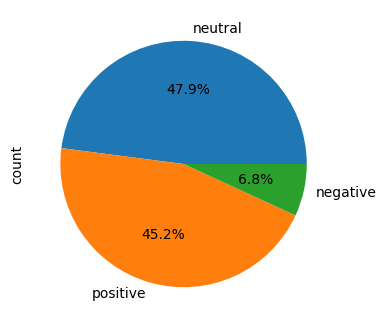

In [10]:
visualize_news_sentiment(naver_news)

# 카카오 정보 탐색/ 요약

## 회사 정보/리뷰 검색

In [11]:
kakao_info = comp_info.get_company_info('카카오')

kakao_news, kakao_reviews, kakao_review_summarized_dict = kakao_info

## 긍정/ 부정 리뷰 한줄 요약

In [12]:
kakao_review_summarized_dict['good_summarise_long']

'업무분장 체계가 확실해서 부담없고 자기분야에만 신경쓰면 전문성도 기를 수 있다.'

In [13]:
kakao_review_summarized_dict['bad_summarise_long']

'기업 규모에 비해 전통 대기업만큼 체계가 없고 무엇을 위해 일하는지 모를때가 많다.'

In [14]:
kakao_review_summarized_dict['good_summarise_short']

'최근 회사에서 직무를 수행하는 사람들이 있다.'

In [18]:
kakao_review_summarized_dict['bad_summarise_short']

'최근 회사에 들어갔다.'

## 최근 기사 링크/ 기사요약/ 기사 평가

In [19]:
kakao_news[['link', 'summarized', 'sentiment']].head(10)

,link,summarized,sentiment
0,http://v.daum.net/v/20230707043459720,"틱비즈(웹툰, 모빌리티)의 성장률이 4년 만에 최대 규모로 감소했다.",negative
1,http://v.daum.net/v/20230707102456044,카카오모빌리티가 7일(현지시간) 지하 주차장 내에서 위치 확인을 받는 서비스를 선보였다.,neutral
2,http://v.daum.net/v/20230707102425035,한정 테슬라 주식 거래에 대한 매매 수수료 무료행사가 시작됐다.,neutral
3,http://v.daum.net/v/20230707100128096,신종 코로나바이러스 감염증(코비드) 팬데믹 이후 최대 규모의 새마을금고 연체액 12조 원,neutral
4,http://v.daum.net/v/20230707100420226,카카오모빌리티가 다음주 서울 코엑스 주차장에서 실내지도 서비스를 선보인다.,neutral
5,http://v.daum.net/v/20230707101815816,"넷마블(MNB, 제일제당)가 올해 7월 열리는 복날을 개최한다.",neutral
6,http://v.daum.net/v/20230707100732367,카카오페이증권이 테슬라 주식 매매 수수료 무료 혜택을 제공한다.,neutral
7,http://v.daum.net/v/20230707100902425,카카오가 지난 2분기 실적이 예상치를 하회할 것이라고 밝혔다.,negative
8,http://v.daum.net/v/20230707082405579,유안타증권이 카카오의 2분기 매출액 1조 8378억원(전년 동기를 대비 -32%)를...,positive
9,http://v.daum.net/v/20230707072801522,카카오의 2분기 매출과 영업이익은 1조900억원에 이르렀다.,positive


## 긍정/부정/중립 기사 비율 시각화

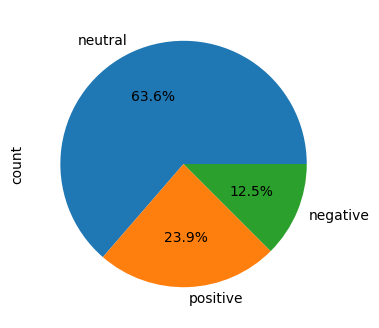

In [20]:
visualize_news_sentiment(kakao_news)